In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stat
import pylab 

In [3]:
#import datasets 
train_dist = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/test_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
test_dist = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/test_set_with_only_distance_feat.csv").drop(["Unnamed: 0"], axis = 1)
test_df = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/dataset_test_without_rev_features.csv").drop(["Unnamed: 0"], axis = 1)
rev = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/revenue_labels.csv").drop(["Unnamed: 0"], axis = 1)
rev2 = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/revenue_labels.csv").drop(["Unnamed: 0"], axis = 1)
test_set = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/simen/test_set_feat.csv")
train_set = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/simen/train_set_feat.csv")
store_impuded = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/simen/stores_gk_impuded.csv")
test_impuded = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/simen/stores_test_impuded.csv")

train_dist

,storesinradiustransformer__in_radius,clustersimilarity__Cluster 0 similarity,clustersimilarity__Cluster 1 similarity,clustersimilarity__Cluster 2 similarity,clustersimilarity__Cluster 3 similarity,clustersimilarity__Cluster 4 similarity,clustersimilarity__Cluster 5 similarity,clustersimilarity__Cluster 6 similarity,clustersimilarity__Cluster 7 similarity,clustersimilarity__Cluster 8 similarity,...,remainder__number_of_lokalt_knutepunkt,remainder__number_of_nasjonalt_knutepunkt,remainder__number_of_regionalt_knutepunkt,remainder__number_of_annen_viktig_holdeplass,remainder__distance_to_mangler_viktighetsnivå,remainder__distance_to_standard_holdeplass,remainder__distance_to_lokalt_knutepunkt,remainder__distance_to_nasjonalt_knutepunkt,remainder__distance_to_regionalt_knutepunkt,remainder__distance_to_annen_viktig_holdeplass
0,5399,6.833058e-01,4.822268e-20,8.781561e-14,7.592275e-72,1.023468e-08,2.022882e-197,1.221600e-02,6.115435e-06,5.714803e-05,...,64,10,13,0,0.000231,0.030165,0.010282,0.026472,0.013886,0.159301
1,636,1.131318e-01,2.620041e-27,3.327225e-09,2.486312e-87,4.219761e-08,5.637809e-224,3.242824e-02,2.091712e-08,4.948041e-02,...,3,0,7,0,0.022422,0.001014,0.019396,0.489463,0.019258,0.135651
2,1309,6.785369e-01,1.829752e-19,2.004087e-14,2.076443e-70,5.796268e-09,1.002473e-194,8.081748e-03,7.601206e-06,2.250523e-05,...,20,0,2,9,0.003690,0.017462,0.012602,0.171475,0.078346,0.024432
3,1253,4.589436e-08,2.457517e-07,2.709982e-16,5.485502e-50,2.763193e-04,4.971434e-177,2.281901e-04,9.747228e-01,1.864269e-14,...,15,0,0,4,0.002887,0.003348,0.019146,0.409014,0.746042,0.033637
4,5345,6.731421e-01,5.566964e-20,9.064024e-14,9.360984e-72,1.113937e-08,2.426287e-197,1.262004e-02,6.671088e-06,5.549395e-05,...,64,10,13,0,0.000919,0.022926,0.007982,0.026247,0.017349,0.155829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,84,5.408875e-15,1.186707e-48,3.047387e-01,5.403542e-130,1.160482e-08,6.280324e-305,1.067719e-07,8.352889e-19,1.933946e-04,...,3,0,0,0,0.003276,0.100738,0.028465,0.161441,0.121447,0.471161
8573,1354,3.775121e-13,1.094182e-47,1.292303e-01,6.642388e-128,7.613282e-09,2.122787e-299,5.763120e-07,3.399627e-18,2.325933e-03,...,20,8,2,8,0.004102,0.002065,0.011969,0.014388,0.031321,0.013542
8574,90,7.105464e-01,3.573830e-19,1.269900e-15,5.103794e-69,9.463756e-10,3.334468e-191,2.795210e-03,4.279698e-06,6.147187e-06,...,3,0,2,0,0.002042,0.023005,0.073009,0.271889,0.001239,0.103923
8575,359,2.452825e-16,2.183616e-43,9.657020e-01,6.537418e-122,6.314580e-06,7.909039e-298,4.191192e-07,6.204512e-16,1.999140e-06,...,2,0,6,0,0.001162,0.060774,0.075504,0.160333,0.091335,0.125114


In [6]:
#Check wether or not a feature is guassian or normal distributed, using Q-Q plot 

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])



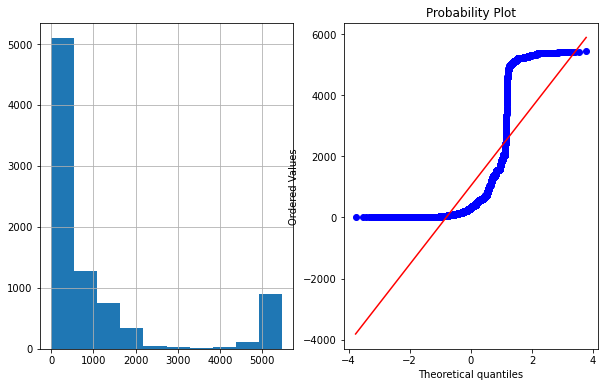

In [7]:
set = train_dist
feature = "storesinradiustransformer__in_radius"
plot_data(set, feature)

### Log Transform 

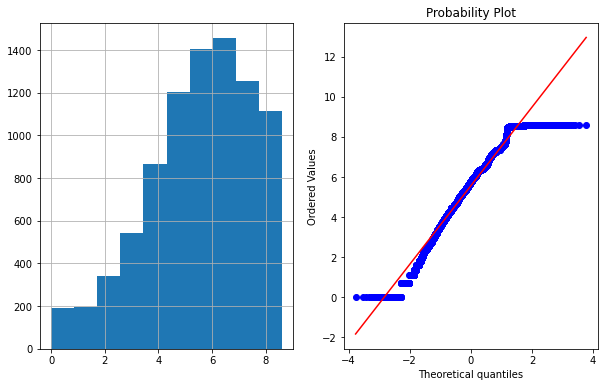

In [8]:
#Taking log(1+x)
set["log_rev"] = np.log(1+set[feature])
plot_data(set, "log_rev")

### Reciprocal Trnasformation

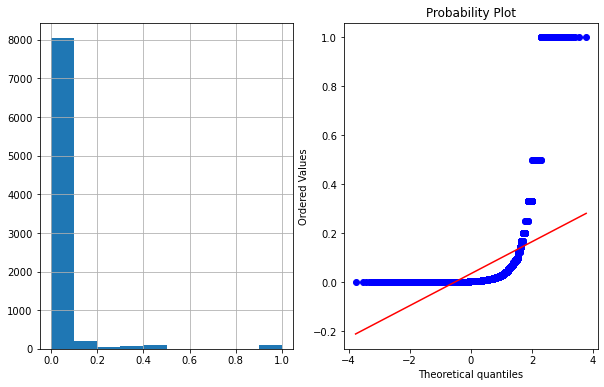

In [9]:
### Taking 1/(1+x)
set["reciprocal_set"] = 1 / (1+set.storesinradiustransformer__in_radius)
plot_data(set, "reciprocal_set")

### Square root transformation 

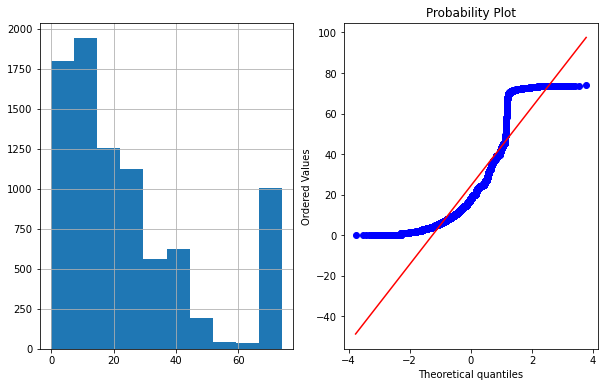

In [12]:
set["squared_set"] = set.storesinradiustransformer__in_radius**(1/2)
plot_data(set, "squared_set")

### Exponential Transdormation

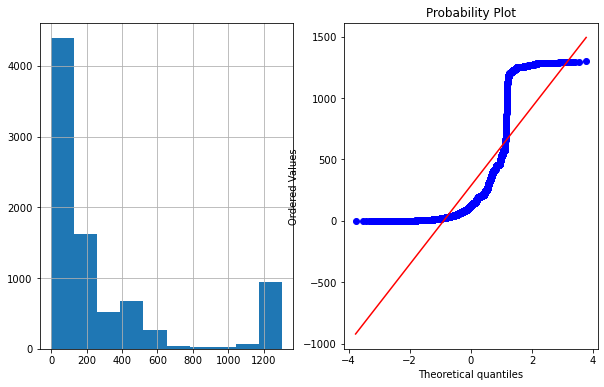

In [13]:
set["exp_set"] = set.storesinradiustransformer__in_radius**(1/1.2)
plot_data(set,"exp_set")

### BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

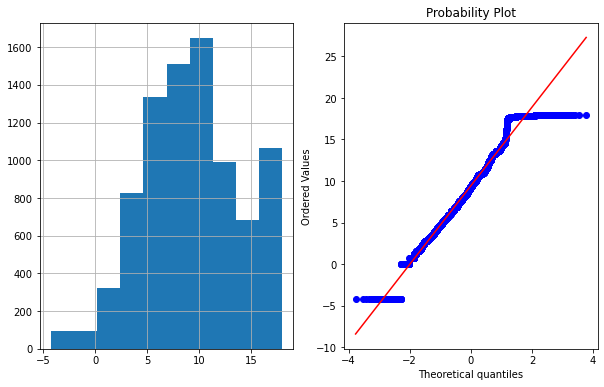

In [14]:
set["boxcox_set"], parameters = stat.boxcox(0.001+ set[feature])

plot_data(set, "boxcox_set")

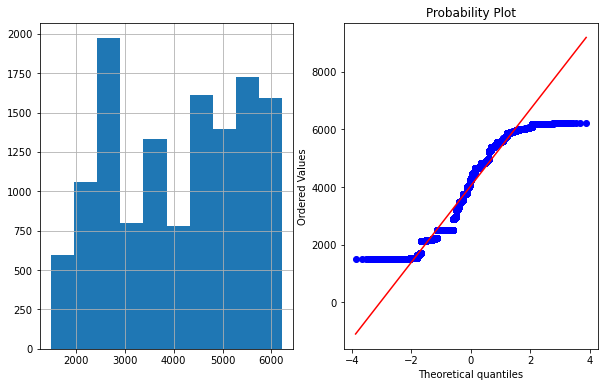

In [ ]:
set["yeo_johnson_set"], parameters = stat.yeojohnson(set["grunnkrets_id"])
plot_data(set, "yeo_johnson_set")

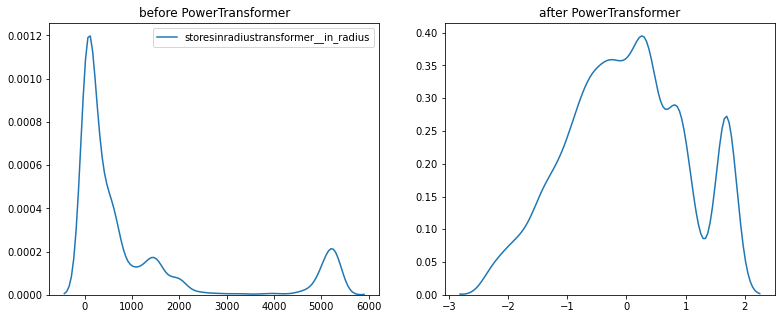

In [15]:
plots(set, feature, PowerTransformer(method='yeo-johnson'))


Text(0.5, 1.0, 'Transformed revenue')

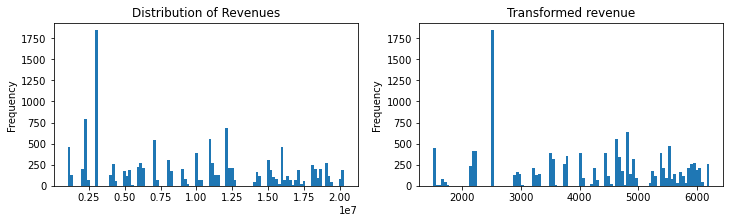

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
set.grunnkrets_id.plot.hist(bins=100, ax=ax1)
ax1.set_title('Distribution of Revenues');
set.yeo_johnson_set.plot.hist(bins=100, ax = ax2)
ax2.set_title("Transformed revenue")

In [ ]:
rev

,revenue,log_rev,reciprocal_rev,squared_rev,exp_rev,boxcox_rev,yeo_johnson_rev
0,17.998,2.944334,0.052637,4.242405,11.117835,3.676042,2.019996
1,23.828,3.211972,0.040277,4.881393,14.046657,4.132067,2.135063
2,16.099,2.839020,0.058483,4.012356,10.131313,3.500447,1.972350
3,9.296,2.331755,0.097125,3.048934,6.410818,2.679960,1.722550
4,4.528,1.709826,0.180897,2.127910,3.520373,1.708970,1.364838
...,...,...,...,...,...,...,...
12854,0.088,0.084341,0.919118,0.296648,0.131948,-2.005420,0.083373
12855,1.816,1.035317,0.355114,1.347590,1.644106,0.626691,0.901289
12856,38.225,3.669314,0.025494,6.182637,20.826818,4.948084,2.313157
12857,3.642,1.535145,0.215424,1.908402,2.936184,1.436448,1.252893


In [ ]:
pt = PowerTransformer()
rev_t1 = pt.fit_transform(rev[['revenue']])
rev_t2 = pt.inverse_transform(rev_t1)

rev["yeo_rev_test"] = rev_t1



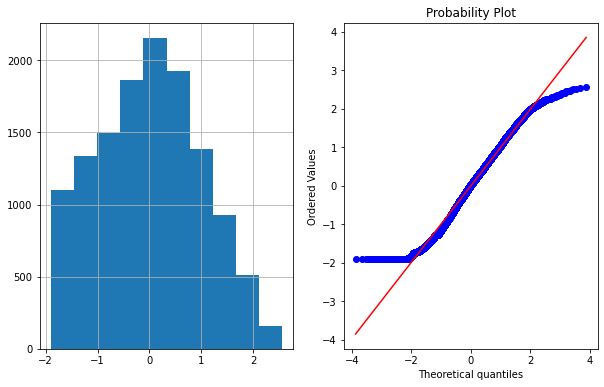

In [ ]:
plot_data(rev, "yeo_rev_test")